In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 日本語フォントの指定
mpl.rcParams['font.family'] = 'IPAexGothic' # ここにインストールしたフォント名を入れる

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [2]:
train = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver1.csv')
test = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver1.csv')
era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [3]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度', '開始', '終了', '緯度*経度', '終了-開始', 'label_棟名', 'label_種別2', 'label_国', 'label_時代', 'label_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'label_所在地', 'label_保管施設の名称', 'label_所有者名', 'label_管理団体又は責任者', 'count_棟名', 'count_種別2', 'count_国', 'count_時代', 'count_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'count_所在地', 'count_保管施設の名称', 'count_所有者名', 'count_管理団体又は責任者', '棟名_緯度_min', '棟名_緯度_max', '棟名_緯度_mean', '棟名_緯度_std', '棟名_経度_min', '棟名_経度_max', '棟名_経度_mean', '棟名_経度_std', '棟名_開始_min', '棟名_開始_max', '棟名_開始_mean', '棟名_開始_std', '棟名_終了_min', '棟名_終了_max', '棟名_終了_mean', '棟名_終了_std', '棟名_緯度*経度_min', '棟名_緯度*経度_max', '棟名_緯度*経度_mean', '棟名_緯度*経度_std', '棟名_終了-開始_min', '棟名_終了-開始_max', '棟名_終了-開始_mean', '棟名_終了-開始_std', '種別2_緯度_min', '種別2_緯度_max', '種別2_緯度_mean', '種別2_緯度_std', '種別2_経度_min', '種別2_経度_max', '種別2_経度_mean', '種別2_経度_std', '種別2_開始_min', '種別2_開始_max', '種別2_開始_mean', '種別2_開始_std', '種別2_終了_min', '種別2_終了_max', '種別2_終了_mean', '種別2_終了_std', '種

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [4]:
# target encoding

# kf = KFold(4)
# kf = KFold(4, groups=train.categorical)　#GroupKFold
kf = StratifiedKFold(5, shuffle=True, random_state=42531) #StratifiedKFold

# Target encoding with K-fold
# te = TargetEncoder(kf.split(train))
# te = TargetEncoder(kf.split(train)) #GroupKFold
te = TargetEncoder(kf.split(train, train[target_col])) #StratifiedKFold

# use fit/fit_transform to train data, then apply transform to test data
train.loc[:, cat_cols] = te.fit_transform(train[cat_cols], train[target_col])
test.loc[:, cat_cols] = te.transform(test[cat_cols])

In [6]:
print(len(cat_cols) + len(num_cols))

249


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.26101
[2]	valid_0's binary_logloss: 0.257634
[3]	valid_0's binary_logloss: 0.255234
[4]	valid_0's binary_logloss: 0.252709
[5]	valid_0's binary_logloss: 0.249873
[6]	valid_0's binary_logloss: 0.248398
[7]	valid_0's binary_logloss: 0.246696
[8]	valid_0's binary_logloss: 0.245194
[9]	valid_0's binary_logloss: 0.244429
[10]	valid_0's binary_logloss: 0.24354
[11]	valid_0's binary_logloss: 0.242591
[12]	valid_0's binary_logloss: 0.241429
[13]	valid_0's binary_logloss: 0.240613
[14]	valid_0's binary_logloss: 0.239156
[15]	valid_0's binary_logloss: 0.238542
[16]	valid_0's binary_logloss: 0.237915
[17]	valid_0's binary_logloss: 0.237312
[18]	valid_0's binary_logloss: 0.236606
[19]	valid_0's binary_logloss: 0.236439
[20]	valid_0's binary_logloss: 0.235662
[21]	valid_0's binary_logloss: 0.234576
[22]	valid_0's binary_logloss: 0.234094
[23]	valid_0's binary_logloss: 0.233463
[24]	valid_0's binary_logloss: 0.232902
[25]	valid_0's binary_logloss: 0.232527
[26]	valid_

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.260693
[2]	valid_0's binary_logloss: 0.257073
[3]	valid_0's binary_logloss: 0.254476
[4]	valid_0's binary_logloss: 0.251381
[5]	valid_0's binary_logloss: 0.248789
[6]	valid_0's binary_logloss: 0.246844
[7]	valid_0's binary_logloss: 0.244458
[8]	valid_0's binary_logloss: 0.242996
[9]	valid_0's binary_logloss: 0.24149
[10]	valid_0's binary_logloss: 0.240684
[11]	valid_0's binary_logloss: 0.239564
[12]	valid_0's binary_logloss: 0.238785
[13]	valid_0's binary_logloss: 0.238132
[14]	valid_0's binary_logloss: 0.237124
[15]	valid_0's binary_logloss: 0.236282
[16]	valid_0's binary_logloss: 0.235409
[17]	valid_0's binary_logloss: 0.234484
[18]	valid_0's binary_logloss: 0.233801
[19]	valid_0's binary_logloss: 0.233055
[20]	valid_0's binary_logloss: 0.232458
[21]	valid_0's binary_logloss: 0.232242
[22]	valid_0's binary_logloss: 0.232079
[23]	valid_0's binary_logloss: 0.231855
[24]	valid_0's binary_logloss: 0.231447
[25]	valid_0's binary_logloss: 0.231017
[26]	valid

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.258436
[2]	valid_0's binary_logloss: 0.253112
[3]	valid_0's binary_logloss: 0.250442
[4]	valid_0's binary_logloss: 0.24663
[5]	valid_0's binary_logloss: 0.243455
[6]	valid_0's binary_logloss: 0.240812
[7]	valid_0's binary_logloss: 0.238321
[8]	valid_0's binary_logloss: 0.23543
[9]	valid_0's binary_logloss: 0.23368
[10]	valid_0's binary_logloss: 0.231668
[11]	valid_0's binary_logloss: 0.230144
[12]	valid_0's binary_logloss: 0.228633
[13]	valid_0's binary_logloss: 0.227054
[14]	valid_0's binary_logloss: 0.226322
[15]	valid_0's binary_logloss: 0.225383
[16]	valid_0's binary_logloss: 0.225043
[17]	valid_0's binary_logloss: 0.224164
[18]	valid_0's binary_logloss: 0.223281
[19]	valid_0's binary_logloss: 0.222791
[20]	valid_0's binary_logloss: 0.221666
[21]	valid_0's binary_logloss: 0.221062
[22]	valid_0's binary_logloss: 0.219942
[23]	valid_0's binary_logloss: 0.219028
[24]	valid_0's binary_logloss: 0.218534
[25]	valid_0's binary_logloss: 0.218109
[26]	valid_0

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[8]	valid_0's binary_logloss: 0.238458
[9]	valid_0's binary_logloss: 0.236692
[10]	valid_0's binary_logloss: 0.234655
[11]	valid_0's binary_logloss: 0.233054
[12]	valid_0's binary_logloss: 0.231889
[13]	valid_0's binary_logloss: 0.230039
[14]	valid_0's binary_logloss: 0.228252
[15]	valid_0's binary_logloss: 0.227376
[16]	valid_0's binary_logloss: 0.226947
[17]	valid_0's binary_logloss: 0.226269
[18]	valid_0's binary_logloss: 0.225898
[19]	valid_0's binary_logloss: 0.225235
[20]	valid_0's binary_logloss: 0.224734
[21]	valid_0's binary_logloss: 0.224531
[22]	valid_0's binary_logloss: 0.223447
[23]	valid_0's binary_logloss: 0.22282
[24]	valid_0's binary_logloss: 0.222395
[25]	valid_0's binary_logloss: 0.222447
[26]	valid_0's binary_logloss: 0.222223
[27]	valid_0's binary_logloss: 0.222369
[28]	valid_0's binary_logloss: 0.221834
[29]	valid_0's binary_logloss: 0.221542
[30]	valid_0's binary_logloss: 0.221377
[31]	valid_0's binary_logloss: 0.220954
[32]	valid_0's binary_logloss: 0.220711
[33

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[8]	valid_0's binary_logloss: 0.235663
[9]	valid_0's binary_logloss: 0.233526
[10]	valid_0's binary_logloss: 0.231786
[11]	valid_0's binary_logloss: 0.229939
[12]	valid_0's binary_logloss: 0.228431
[13]	valid_0's binary_logloss: 0.226692
[14]	valid_0's binary_logloss: 0.225274
[15]	valid_0's binary_logloss: 0.223583
[16]	valid_0's binary_logloss: 0.222164
[17]	valid_0's binary_logloss: 0.22068
[18]	valid_0's binary_logloss: 0.219685
[19]	valid_0's binary_logloss: 0.219024
[20]	valid_0's binary_logloss: 0.217808
[21]	valid_0's binary_logloss: 0.217352
[22]	valid_0's binary_logloss: 0.217133
[23]	valid_0's binary_logloss: 0.216141
[24]	valid_0's binary_logloss: 0.215328
[25]	valid_0's binary_logloss: 0.214844
[26]	valid_0's binary_logloss: 0.214465
[27]	valid_0's binary_logloss: 0.213903
[28]	valid_0's binary_logloss: 0.213471
[29]	valid_0's binary_logloss: 0.212701
[30]	valid_0's binary_logloss: 0.212344
[31]	valid_0's binary_logloss: 0.212129
[32]	valid_0's binary_logloss: 0.21189
[33]

/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 2

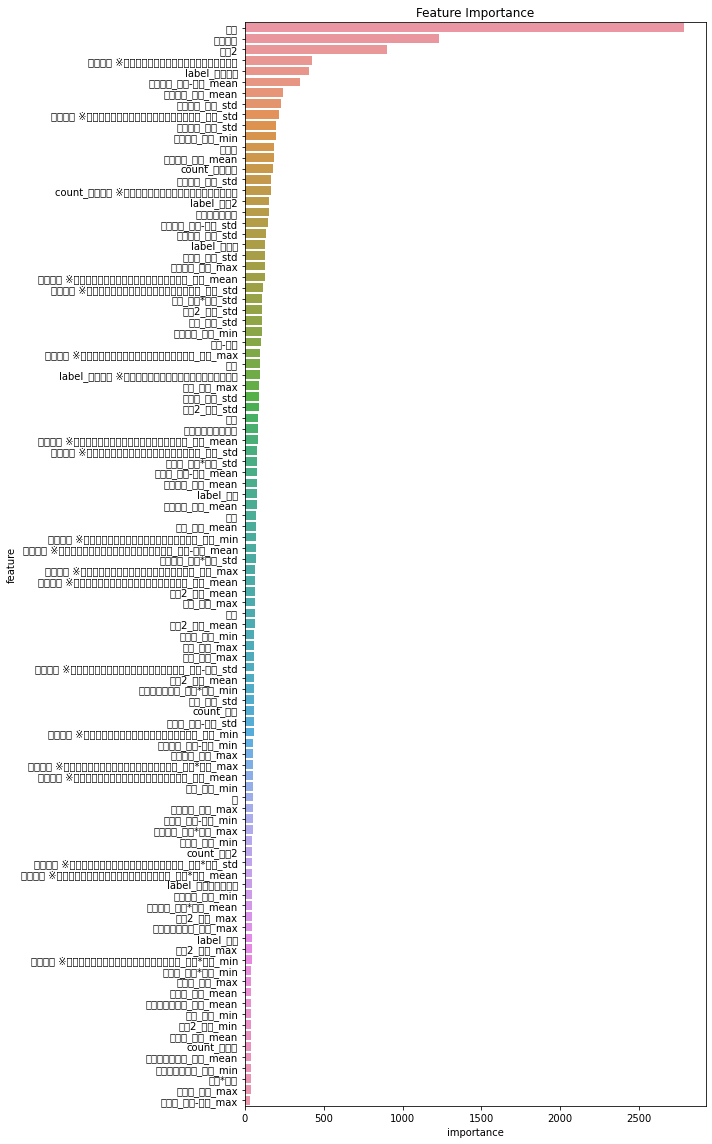

In [7]:
params = {
    'objective': "binary", # binary, multiclass, regression
    'metric': "binary_logloss", # mae, mse, auc, binary_logloss, multi_logloss, rmse, average_precision
    'learning_rate':0.05, #0.05
    'n_estimators': 10000,
    'max_depth': -1,
    'random_state' : 42531
    #'num_leaves' : 100, #カーディナリティが高い場合は大きくする
    #'max_bin' : 500,
}

result = run_experiment(params,
                        train[num_cols + cat_cols],
                        train[target_col],
                        test[num_cols + cat_cols],
                        cv=StratifiedKFold(5, shuffle=True, random_state=42531), #cv=5,
                        #groups=train.group
                        )

In [8]:
print(result.metrics) # Evalulation metrics for each fold

[0.7762359098228664, 0.7963969404186796, 0.8367592592592592, 0.7976247987117552, 0.8431119904899433, 0.8111597709718267]


In [8]:
print(result.metrics) # Evalulation metrics for each fold

[0.759440418679549, 0.7839009661835747, 0.8051127214170692, 0.7867914653784219, 0.8461716437558341, 0.7947945307645299]


In [9]:
result.importance     # Feature importance for each fold

[                       feature   importance
 0                           緯度    82.885201
 1                           経度   161.002251
 2                           開始    39.342669
 3                           終了    25.932130
 4                        緯度*経度    45.969160
 ..                         ...          ...
 244  都道府県 ※美工品は「所有者住所（所在都道府県）」   297.870811
 245                        所在地    74.158830
 246                    保管施設の名称    78.439261
 247                       所有者名  1405.227440
 248                  管理団体又は責任者    76.929121
 
 [249 rows x 2 columns],
                        feature   importance
 0                           緯度    99.590200
 1                           経度   133.524340
 2                           開始    47.968130
 3                           終了    21.092640
 4                        緯度*経度    31.065990
 ..                         ...          ...
 244  都道府県 ※美工品は「所有者住所（所在都道府県）」   434.116547
 245                        所在地   311.415511
 246                    保管施設

In [10]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.01488839 0.27261619 0.23237039 ... 0.16707026 0.01860515 0.01425313]
[0.0036135  0.14755467 0.40548274 ... 0.05196038 0.40644006 0.02532824]


In [11]:
train[target_col].to_numpy()

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.17171717171717174
Best F1 Score: 0.35368754956383824


In [13]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 0 0]
(10065,)


In [14]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,0
10063,0


In [16]:
sample_submission["is_kokuhou"].value_counts()

0    8817
1    1248
Name: is_kokuhou, dtype: int64

In [17]:
sample_submission.to_csv('lightgbm_ver2.csv', index=False)

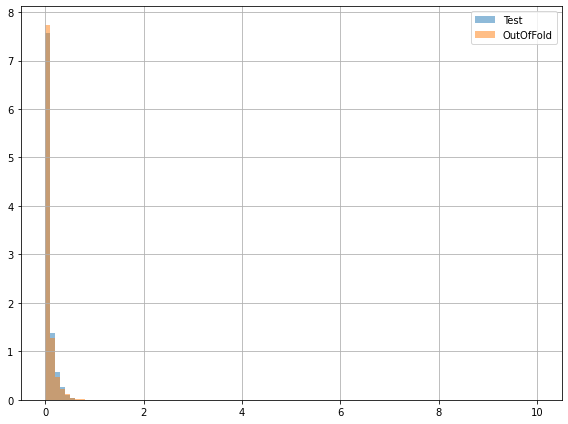

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()